<img src="logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 150A - Intermediate Fluid Mechanics**

<hr />

# Vorticity, streamfunction, and velocity

In this notebook we will discuss the relationship between vorticity ($\omega$), velocity ($\mathbf{u}$), and streamfunction ($\psi$), in two-dimensional flows:

$$ \nabla^2\psi = -\omega $$

and

$$ \mathbf{u} = \nabla\times (\psi \mathbf{k}) $$

We will do this by considering some example vorticity distributions, formed from one or more vortices of the form

$$ \omega(x,y) = \dfrac{\Gamma}{\pi \sigma^2} \mathrm{e}^{-((x-x0)^2+(y-y0)^2)/\sigma^2} $$

This shape is called a *Gaussian*, and physically, represents a type of vortex called an Oseen vortex. The parameter $\Gamma$ is the circulation of this vortex, $\sigma$ is its radius, and $(x0,y0)$ its center.

### Set up the module

In [1]:
using MAE150A

In [2]:
pyplot()
initialize_environment()

### Set up a grid on which to construct our fields
You probably will not have any reason to change these, but you're welcome to play around, of course.

In [3]:
# grid cell size
Δx = 0.02

# set the size of a region in which to set up the flow
xlim = (-2,2)
ylim = (-2,2)

# make the grid
g = PhysicalGrid(xlim,ylim,Δx)

PhysicalGrid{2}((208, 208), (104, 104), 0.02, ((-2.06, 2.06), (-2.06, 2.06)))

Set up some other data structures for later use. You shouldn't need to touch these.

In [4]:
ω = Nodes(Dual,size(g))
umag = Nodes(Primal,size(g))

xg,yg = coordinates(ω,g) # coordinates of grid points at which vorticity is evaluated
xc,yc = coordinates(umag,g) # coordinates of grid points at which velocity magnitude is evaluated

# Discrete Laplacian operator and its inverse
L = plan_laplacian(ω,with_inverse=true);

### Now set up a single vortex at the origin and let's look at it

In [5]:
Γ = 1
σ = 0.2;
vort = OseenVortex(0,0,Γ,σ)

OseenVortex(0, 0, 1, 0.2)

The next line evaluates the vortex at all points on the grid.

Note: We use a couple of Julia tricks here. It's not important to know the details. But if you're interested: the apostrophe after yg means `transpose`. So `xg`,`yg'` gives the coordinates of the rows and columns of the Cartesian grid. The `@.` means *vectorize* the next operation, i.e., perform this operation at every value of `xg` and every value of `yg` and assign the result to the array `ω`.

In [6]:
@. ω = vort(xg,yg');

Now plot the vorticity field

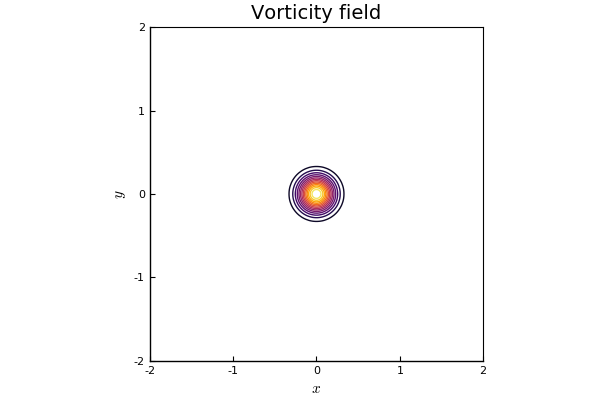

In [7]:
plot(xg,yg,ω,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Vorticity field")

#### Now let's compute the streamfunction
We need to solve the Poisson equation to get the streamfunction, $\psi$:

$$ \nabla^2 \psi = -\omega $$

Details, if interested: We have set up the $L$ operator to be a discrete version of $\nabla^2$ on the grid (using finite differences). But strictly speaking, $L \approx \Delta x^2 \nabla^2$, where $\Delta x$ is the grid spacing. The inverse of $L$ is also available. We use the *backslash* (`\`) to provide this inverse. So the discrete solution is

In [8]:
ψ = -Δx^2*(L\ω);

Plot the streamfunction contours

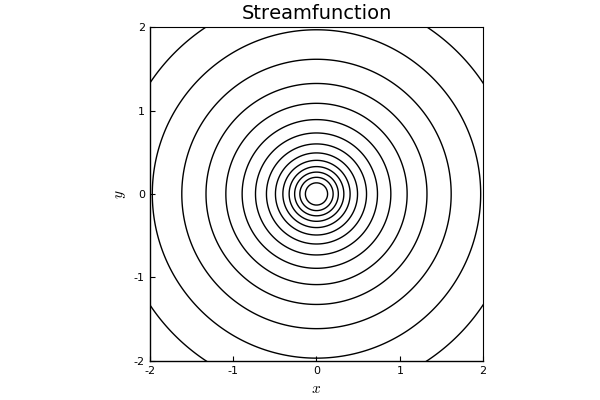

In [9]:
plot(xg,yg,ψ,color=:black,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Streamfunction")

Remember that each of these contours of streamfunction is a **streamline**. The only drawback is that the arrows aren't on it. (How would you determine the direction of the streamlines?)

It probably is not a surprise that the streamlines of a radially-symmetric vortex are a bunch of concentric circles. This makes it clear that a vortex is a region of rotational flow.

#### Finally, compute the velocity field
Here, we take the curl of the streamfunction (treating the streamfunction as a vector directed out of the screen),

$$ \mathbf{u} = \nabla\times (\psi\mathbf{k}) $$

The discrete curl operator is simply called `curl` but we have to divide by the grid spacing to get the correct approximation of the actual curl.

In [10]:
u = curl(ψ)/Δx;

Now plot them

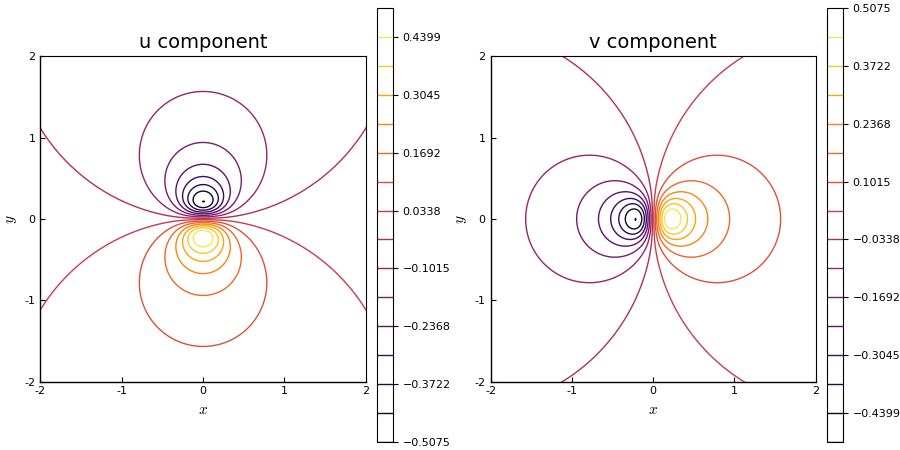

In [11]:
xu, yu, xv, yv = coordinates(u,g)
ps1 = plot(xu,yu,u.u,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="u component",colorbar=:true)
ps2 = plot(xv,yv,u.v,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="v component",colorbar=:true)
plot(ps1,ps2,size=(900,450))

These are not as obvious to interpret. But with a little bit of thought, you can see that regions of large $x$ velocity are above and below the vortex, and regions of large $y$ velocity are on the sides.

#### The velocity magnitude

The speed of the flow, $|\mathbf{u}|$, is a little easier to interpret. But where is the speed the largest?

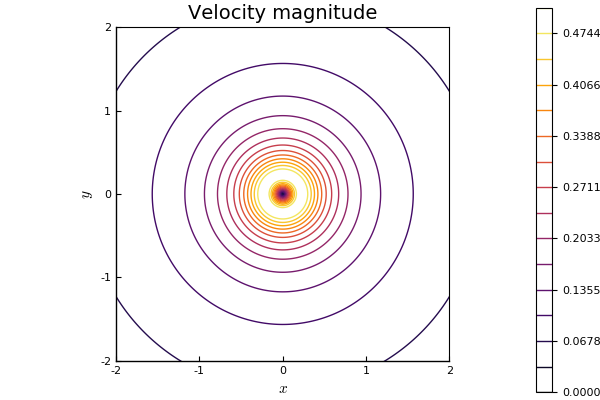

In [12]:
umag = mag(u);
plot(xc,yc,umag,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Velocity magnitude",colorbar=:true)

To see the speed distribution a little better, try plotting along a slice $y = 0$.

For those that like details: To get this slice, we construct a function that interpolates the velocity magnitude field on the grid, and we can then evaluate that function at any x,y location we like. Here, we evaluate it at $y = 0$ in a range of points along the $x$ axis.

In [13]:
umag_fcn = interpolatable_field(xc,yc,umag);

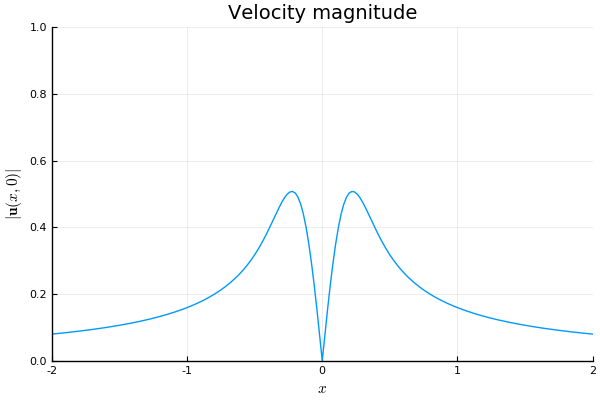

In [14]:
plot(xc,umag_fcn.(xc,0),xlim=(-2,2),ylim=(0,1),xlabel=L"x",ylabel=L"|\mathbf{u}(x,0)|",title="Velocity magnitude",legend=false)

The velocity is actually zero at the center and maximum a little bit away from the center. Try changing $\sigma$ and seeing how this location of maximum speed changes.

### Construct a pair of vortices

In [15]:
Γ = 1
σ = 0.3
v1 = OseenVortex(-1,0,Γ,σ)
v2 = OseenVortex(1,0,Γ,σ)

OseenVortex(1, 0, 1, 0.3)

In [16]:
@. ω = v1(xg,yg') + v2(xg,yg');

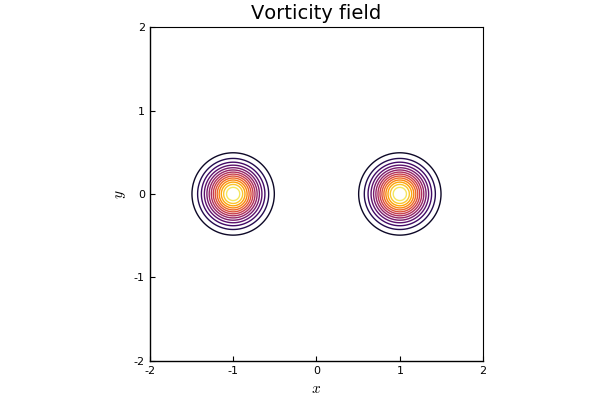

In [17]:
plot(xg,yg,ω,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Vorticity field")

In [18]:
ψ = -Δx^2*(L\ω);

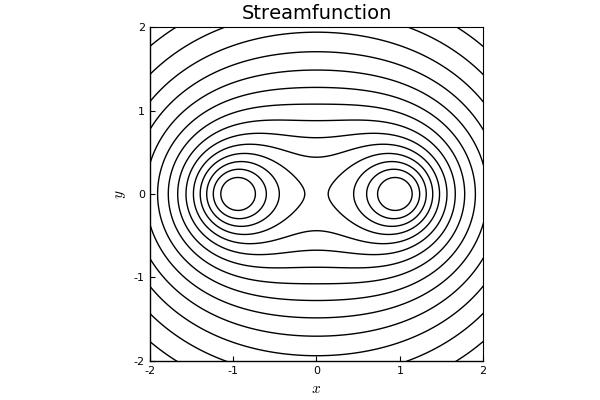

In [19]:
plot(xg,yg,ψ,color=:black,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Streamfunction")

#### Stagnation points
Where are the stagnation points for this flow? There are a few ways to hunt for them:
* where streamlines cross
* where velocity components both vanish
* where velocity magnitude is zero

Let's try the second approach. We will plot the zero contour (the contour for which the value is zero) of the $x$ and $y$ components of velocity and lay them on top of each other. Stagnation points correspond to where the zero contours of each component cross. We will put the streamlines in the plot, too, just for reference.

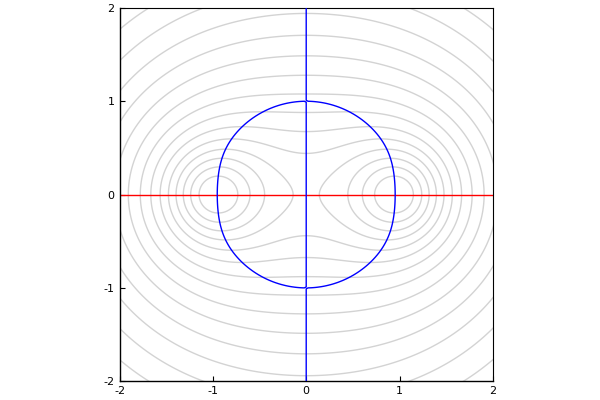

In [20]:
u = curl(ψ)/Δx;
xu, yu, xv, yv = coordinates(u,g)
plot(xg,yg,ψ,color=:lightgray)
plot!(xu,yu,u.u,levels=[0],color=:red,xlim=(-2,2),ylim=(-2,2)) # x component in red
plot!(xv,yv,u.v,levels=[0],color=:blue) # y component in red

So there are three stagnation points: one near each of the vortex centers and a third one right at the origin.

### Make some other vorticity fields and explore the associated streamlines here
Add more vortices, change their locations, their strengths (positive or negative), their radius. Explore!

In [21]:
Γ = 1
σ = 0.3
v1 = OseenVortex(-1,0,Γ,σ)
v2 = OseenVortex(1,0,Γ,σ)
v3 = OseenVortex(0,1,-Γ,σ)
v4 = OseenVortex(0,-1,-Γ,σ)

OseenVortex(0, -1, -1, 0.3)

In [61]:
@. ω = v1(xg,yg') + v2(xg,yg') + v3(xg,yg') #+ v4(xg,yg');

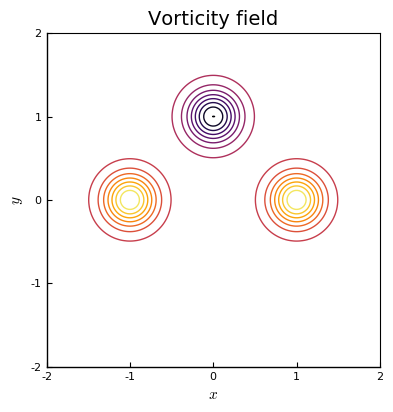

In [62]:
ps = plot(xg,yg,ω,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Vorticity field")
savefig(ps,"Vort3vortex.pdf")

In [63]:
ψ = -Δx^2*(L\ω);

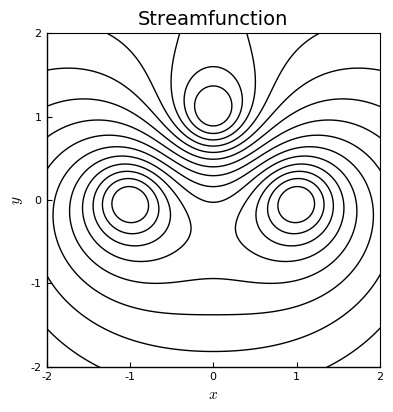

In [64]:
ps = plot(xg,yg,ψ,color=:black,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Streamfunction")
savefig(ps,"SF3vortex.pdf")

In [65]:
u = curl(ψ)/Δx;

Now plot them

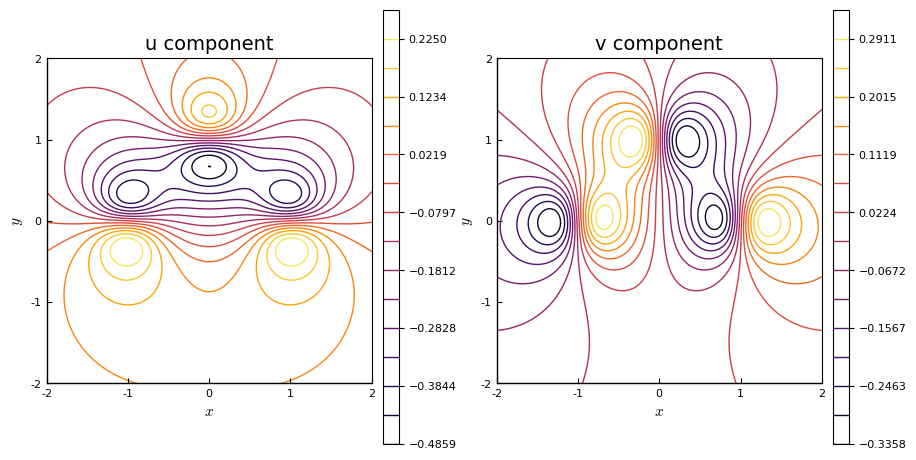

In [66]:
xu, yu, xv, yv = coordinates(u,g)
ps1 = plot(xu,yu,u.u,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="u component",colorbar=:true)
ps2 = plot(xv,yv,u.v,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="v component",colorbar=:true)
ps = plot(ps1,ps2,size=(900,450))
savefig(ps,"Vel3vortex.pdf")

In [100]:
umag = mag(u)
umag_fcn = interpolatable_field(xc,yc,umag);
function f!(F,x)
    F[1] = umag_fcn(x[1],x[2])^2
end

f! (generic function with 1 method)

In [122]:
sol = nlsolve(f!, [0,1.0])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 1.0]
 * Zero: [NaN, NaN]
 * Inf-norm of residuals: 0.025331
 * Iterations: 1000
 * Convergence: false
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: false
 * Function Calls (f): 1001
 * Jacobian Calls (df/dx): 1

In [111]:
sol.zero

2-element Array{Float64,1}:
 -0.9990449640423105 
 -0.04250060493696706

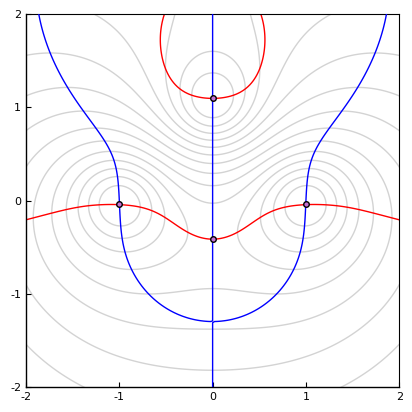

In [124]:
plot(xg,yg,ψ,color=:lightgray)
plot!(xu,yu,u.u,levels=[0],color=:red,xlim=(-2,2),ylim=(-2,2)) # x component in red
plot!(xv,yv,u.v,levels=[0],color=:blue) # y component in red
xstag = [-0.999,0.999,0,0]
ystag = [-0.0425,-0.0425,-0.415,1.1]
scatter!(xstag,ystag)
savefig("stagpts3vortex.pdf")

Now plot them

In [79]:
using Pkg
Pkg.add("NLsolve")

  Updating `~/Dropbox/MAE150A/Julia/MAE150A/Project.toml`
  [4076af6c] - JuMP v0.20.1
  Updating `~/Dropbox/MAE150A/Julia/MAE150A/Manifest.toml`
  [6e4b80f9] - BenchmarkTools v0.4.3
  [49dc2e85] - Calculus v0.5.1
  [523fee87] - CodecBzip2 v0.6.0
  [944b1d66] - CodecZlib v0.6.0
  [cd3eb016] - HTTP v0.8.8
  [83e8ac13] - IniFile v0.5.0
  [7d188eb4] - JSONSchema v0.2.0
  [4076af6c] - JuMP v0.20.1
  [b8f27783] - MathOptInterface v0.9.10
  [739be429] - MbedTLS v0.7.0
  [d8a4904e] - MutableArithmetics v0.2.2
  [3bb67fe8] - TranscodingStreams v0.9.5
  Updating `~/Dropbox/MAE150A/Julia/MAE150A/Project.toml`
  [76087f3c] - NLopt v0.5.1
  Updating `~/Dropbox/MAE150A/Julia/MAE150A/Manifest.toml`
  [fdba3010] - MathProgBase v0.7.7
  [76087f3c] - NLopt v0.5.1
 Resolving package versions...
  Updating `~/Dropbox/MAE150A/Julia/MAE150A/Project.toml`
  [2774e3e8] + NLsolve v4.3.0
  Updating `~/Dropbox/MAE150A/Julia/MAE150A/Manifest.toml`
 [no changes]


In [80]:
using NLsolve